In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [2]:
# seu código
ideb = pd.read_csv('ideb.csv',usecols=['ano','sigla_uf','taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb'])
ideb.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.6,2.3
1,2005,AC,49.3,151.8,149.6,1.8


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [3]:
# seu código
ideb_2019 = ideb[ideb.ano == 2019]
ideb_2019.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
8947,2019,AC,98.2,288.92,263.10,8.1
8948,2019,AC,96.5,254.78,231.63,6.8
8949,2019,AC,97.7,246.47,228.63,6.7
8950,2019,AC,97.6,256.67,231.75,6.9
8951,2019,AL,100.0,261.32,223.47,7.0


In [4]:
# agrupando os dados por estado, agregando pela média
ideb_2019 = ideb_2019.groupby(by='sigla_uf').mean().reset_index()
ideb_2019.head(2)

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295


### Atividade 3: Padronize os dados.

In [5]:
# instanciando a função
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = ideb_2019.copy()

# removendo dados categóricos
df_scaled.drop(columns=['sigla_uf','ano'], inplace=True)

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# acrescentando a coluna estado
df_scaled['sigla_uf'] = ideb_2019['sigla_uf']

df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,sigla_uf
0,-0.025280,0.080727,-0.016434,0.092154,AC
1,0.801179,-0.437122,-0.531887,-0.201424,AL
2,-0.426168,-1.474271,-1.443233,-1.063297,AM
3,-1.670713,-1.889188,-1.751891,-1.674063,AP
4,-1.323101,-0.713999,-0.626401,-1.060175,BA


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

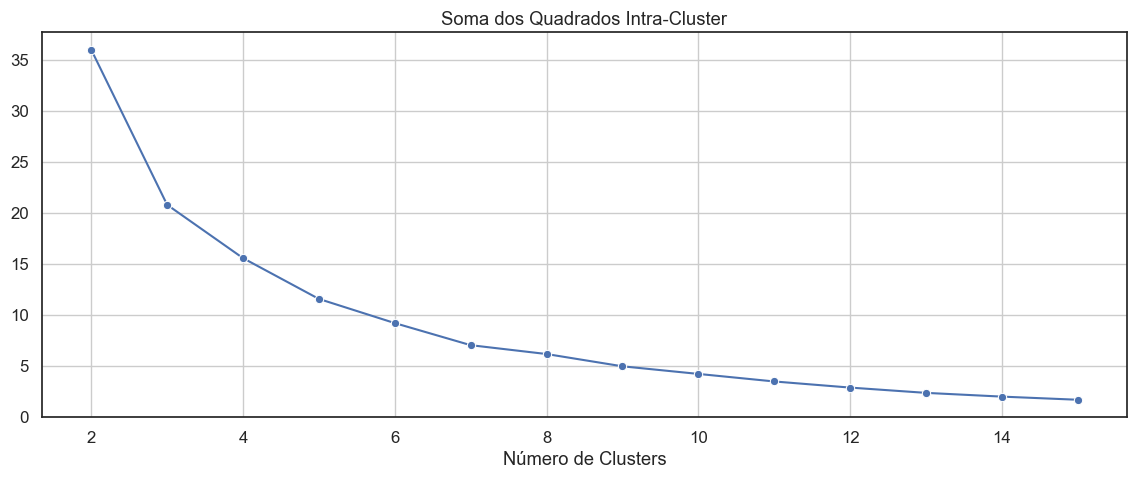

In [6]:
sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})
# seu código
inercia = []
k_min = 2
k_max = 15

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao',
                          'nota_saeb_matematica',
                          'nota_saeb_lingua_portuguesa',
                          'ideb']])
    inercia.append(kmeans.inertia_)

sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True)

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

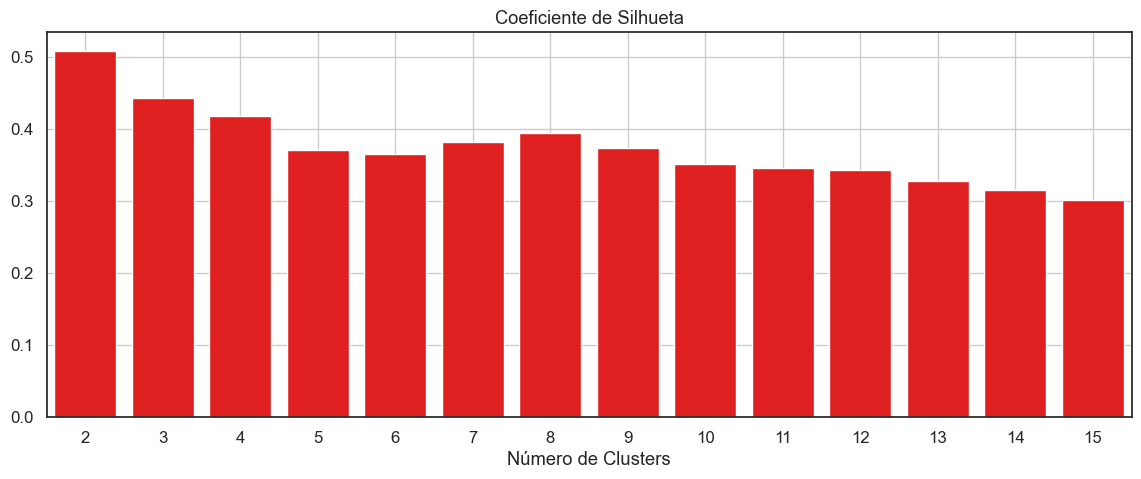

In [7]:
# seu código
silhueta = []
k_min = 2
k_max = 15
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao',
                          'nota_saeb_matematica',
                          'nota_saeb_lingua_portuguesa',
                          'ideb']])
    silhueta.append(silhouette_score(df_scaled[['taxa_aprovacao',
                          'nota_saeb_matematica',
                          'nota_saeb_lingua_portuguesa',
                          'ideb']],
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.barplot(x=n, y=silhueta, color='red')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

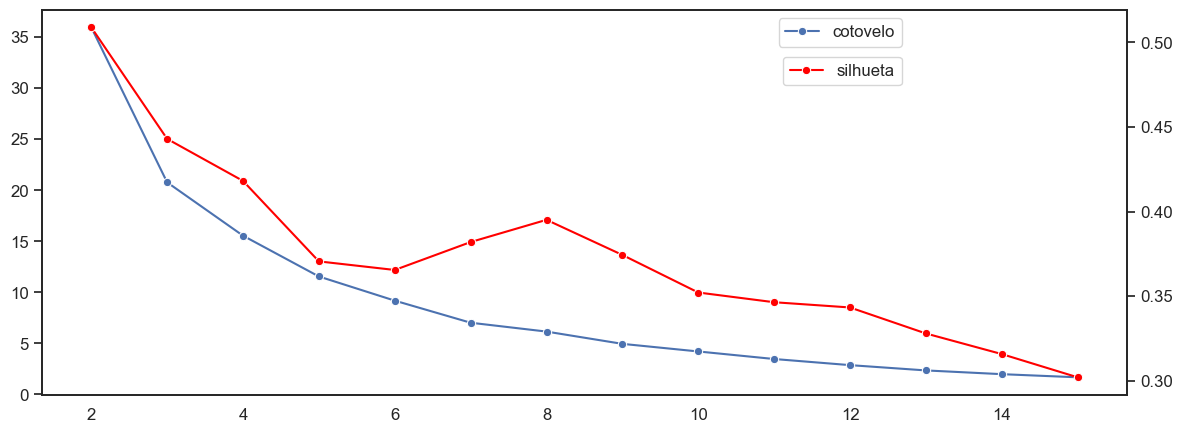

In [8]:
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min,k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [9]:
# instanciando o algoritmo
kmeans = KMeans(n_clusters=4, random_state=42)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled[['taxa_aprovacao',
                        'nota_saeb_matematica',
                        'nota_saeb_lingua_portuguesa',
                        'ideb']])

# criando a coluna 'grupo'
df_scaled['grupos'] = kmeans.labels_.tolist()

### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

In [10]:
fig = px.scatter_3d(df_scaled, x='taxa_aprovacao', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos')
fig.show()

In [11]:
fig = px.scatter_3d(df_scaled, x='ideb', y='nota_saeb_matematica', z='taxa_aprovacao',
              color='grupos')
fig.show()

In [12]:
fig = px.scatter_3d(df_scaled, x='ideb', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos')
fig.show()

### Atividade 8: Quais são os estados de cada grupo?

In [13]:
# seu código
fig = px.scatter_3d(df_scaled, x='taxa_aprovacao', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos',text='sigla_uf')
fig.show()

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

In [14]:
colunas_plotadas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa','ideb']

In [15]:
# seu código
for i in colunas_plotadas:
    fig = px.box(df_scaled, x="grupos", y=f'{i}')
    fig.show()

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [16]:
g0 = df_scaled[df_scaled.grupos==0]
g1 = df_scaled[df_scaled.grupos==1]
g2 = df_scaled[df_scaled.grupos==2]
g3 = df_scaled[df_scaled.grupos==3]

In [17]:
# seu código ANOVA
for i in colunas_plotadas:
    print('+'*100)
    print(i)
    print(pairwise_tukeyhsd(endog = df_scaled[f'{i}'],
                  groups = df_scaled.grupos,
                  alpha = 0.05))
    print('+'*100)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
taxa_aprovacao
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    1.096 0.0134  0.1935  1.9985   True
     0      2   2.3592    0.0  1.4567  3.2617   True
     0      3   1.3328 0.0005  0.5466  2.1191   True
     1      2   1.2632 0.0118  0.2398  2.2865   True
     1      3   0.2368 0.8919 -0.6856  1.1593  False
     2      3  -1.0264 0.0254 -1.9488 -0.1039   True
----------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nota_saeb_matematica
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
-------------------------

### Atividade 11: Faça a clusterização com outro valor para k.

In [18]:
# seu código
# instanciando o algoritmo
kmeans = KMeans(n_clusters=5, random_state=42)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled[['taxa_aprovacao',
                        'nota_saeb_matematica',
                        'nota_saeb_lingua_portuguesa',
                        'ideb']])

# criando a coluna 'grupo'
df_scaled['grupos'] = kmeans.labels_.tolist()

In [19]:
g0 = df_scaled[df_scaled.grupos==0]
g1 = df_scaled[df_scaled.grupos==1]
g2 = df_scaled[df_scaled.grupos==2]
g3 = df_scaled[df_scaled.grupos==3]

In [20]:
# seu código ANOVA
for i in colunas_plotadas:
    print('+'*100)
    print(i)
    print(pairwise_tukeyhsd(endog = df_scaled[f'{i}'],
                  groups = df_scaled.grupos,
                  alpha = 0.05))
    print('+'*100)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
taxa_aprovacao
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.4669 0.4277 -1.2599  0.3261  False
     0      2   0.1394 0.9697 -0.5241  0.8029  False
     0      3   1.3354 0.0005  0.5424  2.1284   True
     0      4  -1.7747    0.0 -2.5186 -1.0308   True
     1      2   0.6063 0.1551  -0.146  1.3586  False
     1      3   1.8023    0.0  0.9336   2.671   True
     1      4  -1.3078 0.0009 -2.1319 -0.4837   True
     2      3    1.196 0.0009  0.4437  1.9483   True
     2      4  -1.9141    0.0 -2.6144 -1.2137   True
     3      4  -3.1101    0.0 -3.9342  -2.286   True
----------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++

In [21]:
fig = px.scatter_3d(df_scaled, x='taxa_aprovacao', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos',text='sigla_uf')
fig.show()

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: A com k = 4 aparentemente apresenta resultados mais satisfatórios se comparados com o teste de hipótese ANOVA e o gráfico 3D.

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

Podemos analisar primeiro se podemos ou não excluir algumas colunas. Remover variáveis redundantes. Observar se elas possuem correlação alta, caso tenha, é até recomendado que exclua uma das colunas da base, pois provavelmente ela acabará dando um peso maior em uma variável.

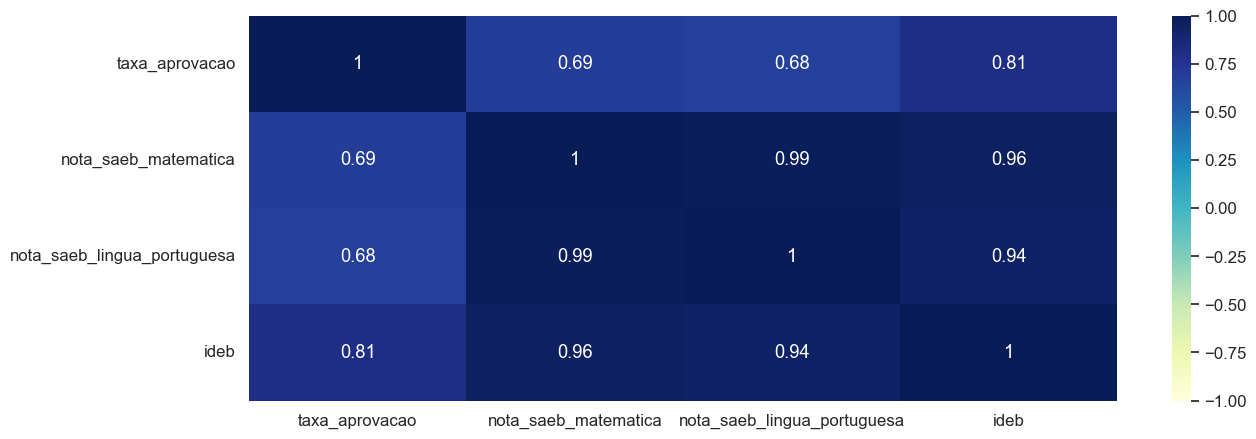

In [30]:
# sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(ideb_2019[['taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']].corr(), vmin=-1, vmax=1, annot=True,cmap='YlGnBu');
plt.show()

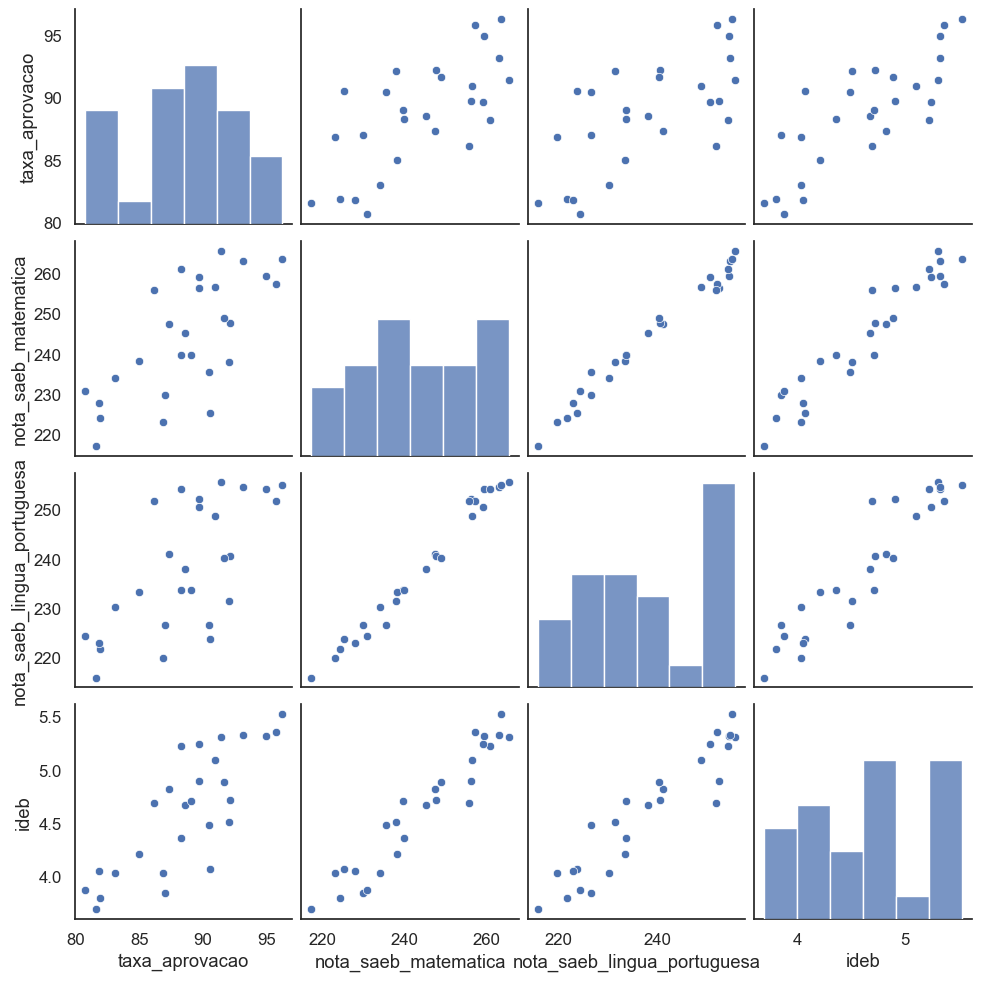

In [33]:
sns.pairplot(ideb_2019[['taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']])
plt.show()

Podemos observar que os dados possuem uma alta correlação segundo os gráficos acima. Assim, dava para remover alguns dados.

Eu removeria o IDEB, pois ele possui alta correlação com as 3 variáveis.